In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

In [3]:
change_axis = np.array([
    [-1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
])

In [4]:
def translate(r):
    return np.array([
        [1,0,0,0],
        [0,1,0,r],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [5]:
def rotate_phi(phi):
    angle = (phi-90)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [1,0,0,0],
        [0, c,-s, 0],
        [0,s,c,0],
        [0,0,0,1]
    ])


In [6]:
def rotate_theta(theta):
    angle = (90-theta)/180.*np.pi
    c, s = np.cos(angle), np.sin(angle)
    return np.array([
        [c,-s,0,0],
        [s,c,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])

In [7]:
def w2c(r,theta, phi):
    return change_axis @ translate(-r) @ rotate_phi(phi) @ rotate_theta(theta)
def c2w(r,theta,phi):
    return rotate_theta(theta).T @ rotate_phi(phi).T @ translate(r) @ change_axis

In [22]:
origin = np.array([0,0,0,1])
view_dir = np.array([0,0,-1,1])
upward = np.array([0,1,-1,1])[...,None]
origin, view_dir = origin[...,None], view_dir[..., None]

(4, 1) (4, 1) (3,)
dot with up [-2.46519033e-32]  /  dot with front [-2.46519033e-32]
(4, 1) (4, 1) (3,)
dot with up [0.]  /  dot with front [0.]
(4, 1) (4, 1) (3,)
dot with up [0.]  /  dot with front [0.]
(4, 1) (4, 1) (3,)
dot with up [0.]  /  dot with front [0.]
(4, 1) (4, 1) (3,)
dot with up [2.46519033e-32]  /  dot with front [2.46519033e-32]


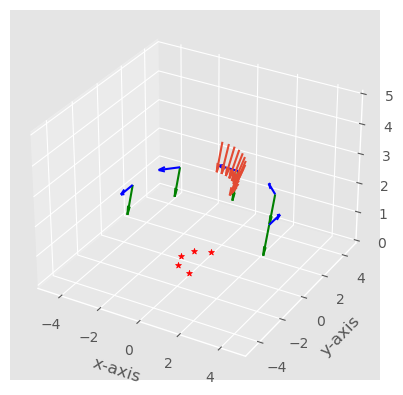

In [33]:
r = 4
phi = 30
thetas = np.linspace(0, 90, 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for theta in thetas:
    start = c2w(r,theta, phi) @ origin
    dest = c2w(r,theta, phi) @ view_dir
    delta = dest - start
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2])

phi = 60
thetas = np.linspace(0, 180, 5)
for theta in thetas:
    matrix = c2w(r,theta, phi)
    start =  matrix @ origin
    dest = matrix @ view_dir
    up = matrix @ upward

    ax.scatter(matrix[:3,0][0], matrix[:3,0][1], matrix[:3,0][2], c='red', marker='*')
    ax.quiver(start[0], start[1], start[2], delta[0], delta[1], delta[2], color='g')
    ax.quiver(start[0], start[1], start[2], matrix[:3,0][0], matrix[:3,0][1], matrix[:3,0][2], color='b')
    print(f"dot with up {matrix[:3,0].T @ up[:3]}  /  dot with front {matrix[:3,0] @ dest[:3]}")

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

In [1]:
import torch
import numpy as np

trans_t = lambda t : torch.Tensor([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,t],
    [0,0,0,1]]).float()

rot_phi = lambda phi : torch.Tensor([
    [1,0,0,0],
    [0,np.cos(phi),-np.sin(phi),0],
    [0,np.sin(phi), np.cos(phi),0],
    [0,0,0,1]]).float()

rot_theta = lambda th : torch.Tensor([
    [np.cos(th),0,-np.sin(th),0],
    [0,1,0,0],
    [np.sin(th),0, np.cos(th),0],
    [0,0,0,1]]).float()

In [2]:
def pose_spherical(theta, phi, radius):
    c2w = trans_t(radius)
    c2w = rot_phi(phi/180.*np.pi) @ c2w
    c2w = rot_theta(theta/180.*np.pi) @ c2w
    c2w = torch.Tensor(np.array([[-1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])) @ c2w
    return c2w

In [3]:
pose_spherical(120, 30, 4)

tensor([[ 0.5000,  0.4330,  0.7500,  3.0000],
        [ 0.8660, -0.2500, -0.4330, -1.7321],
        [ 0.0000,  0.8660, -0.5000, -2.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])